<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/OOP_mines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Объявите два класса:

Cell - для представления клетки игрового поля;
GamePole - для управления игровым полем, размером N x N клеток.

С помощью класса Cell предполагается создавать отдельные клетки командой:

c1 = Cell(around_mines, mine)

Здесь around_mines - число мин вокруг данной клетки поля; mine - булева величина (True/False), означающая наличие мины в текущей клетке. При этом, в каждом объекте класса Cell должны создаваться локальные свойства:

around_mines - число мин вокруг клетки (начальное значение 0);
mine - наличие/отсутствие мины в текущей клетке (True/False);
fl_open - открыта/закрыта клетка - булево значение (True/False). Изначально все клетки закрыты (False).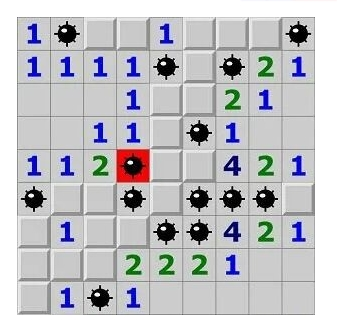

С помощью класса GamePole должна быть возможность создавать квадратное игровое поле с числом клеток N x N:

pole_game = GamePole(N, M)

Здесь N - размер поля; M - общее число мин на поле. При этом, каждая клетка представляется объектом класса Cell и все объекты хранятся в двумерном списке N x N элементов - локальном свойстве pole объекта класса GamePole.

В классе GamePole должны быть также реализованы следующие методы:

init() - инициализация поля с новой расстановкой M мин (случайным образом по игровому полю, разумеется каждая мина должна находиться в отдельной клетке).
show() - отображение поля в консоли в виде таблицы чисел открытых клеток (если клетка не открыта, то отображается символ #; мина отображается символом *; между клетками при отображении ставить пробел).

При создании экземпляра класса GamePole в его инициализаторе следует вызывать метод init() для первоначальной инициализации игрового поля.

В классе GamePole могут быть и другие вспомогательные методы.

Создайте экземпляр pole_game класса GamePole с размером поля N = 10 и числом мин M = 12.

In [1]:
from random import choice, randint as r

class Cell:
    def __init__(self, around_mines=0, mine=False):
        self.around_mines = around_mines
        self.mine = mine
        self.fl_open = True


class GamePole:
    def __init__(self, N, M):
        self.N = N
        self.M = M
        self.pole = [[Cell() for i in range(self.N)] for j in range(self.N)]
        self.init()

    def init(self):
        count = 0
        while count < self.M:
            i = r(0, self.N - 1)
            j = r(0, self.N - 1)
            if not self.pole[i][j].mine:
                self.pole[i][j].mine = True
                count += 1

        indx = (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)
        for x in range(self.N):
            for y in range(self.N):
                if not self.pole[x][y].mine:
                    mines = sum(
                        (self.pole[x + i][y + j].mine for i, j in indx if
                         0 <= x + i < self.N and 0 <= y + j < self.N))
                    self.pole[x][y].around_mines = mines

    def show(self):
        for row in self.pole:
            print(*map(lambda x: '#' if not x.fl_open else x.around_mines if not x.mine else '*', row))


pole_game = GamePole(10, 12)
pole_game.show()

1 * 2 1 0 0 1 * 1 0
1 3 * 3 1 1 1 1 1 0
0 2 * 3 * 1 1 1 1 0
0 1 2 3 2 1 1 * 1 0
0 0 1 * 1 0 1 1 2 1
0 0 1 1 1 0 0 0 1 *
0 0 0 0 1 1 1 1 2 2
1 1 1 0 1 * 1 1 * 1
1 * 1 0 1 1 2 2 2 1
1 1 1 0 0 0 1 * 1 0
